In [1]:
import json
import pandas as pd
import numpy as np
import ast
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv("datasets/tmdb_5000_movies.csv")

credits = pd.read_csv("datasets/tmdb_5000_credits.csv")

print("movies:", movies.shape)
print("credits:", credits.shape)

movies: (4803, 20)
credits: (4803, 4)


In [4]:
#primeras filas
display(movies.head())
display(credits.head())

#info y estadistica basica
movies.info()
movies.describe(include='all').T

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
budget,4803.0,NaN,NaN,NaN,29045039.875286,40722391.25855,0.0,790000.0,15000000.0,40000000.0,380000000.0
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,1712,1691,http://www.thehungergames.movie/,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,4803.0,NaN,NaN,NaN,57165.484281,88694.614033,5.0,9014.5,14629.0,58610.5,459488.0
keywords,4803,4222,[],412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,4803,37,en,4505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,4803,4801,Batman,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,4800,4800,"In the 22nd century, a paraplegic Marine is di...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,4803.0,NaN,NaN,NaN,21.492301,31.81665,0.0,4.66807,12.921594,28.313505,875.581305
production_companies,4803,3697,[],351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#convertir fecha de estreno
movies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")

#tipos numerics
movies["budget"] = pd.to_numeric(movies["budget"], errors="coerce").fillna(0).astype(int)
movies["revenue"] = pd.to_numeric(movies["revenue"], errors="coerce").fillna(0).astype(int)
movies["runtime"] = pd.to_numeric(movies["runtime"], errors="coerce")

#revisar nulos
movies[["release_date","budget","revenue","runtime"]].isnull().sum()

release_date    1
budget          0
revenue         0
runtime         2
dtype: int64

In [6]:
#funcion para parsear listas representadas como texto
def safe_parse(text):
    try:
        return ast.literal_eval(text)
    except Exception:
        return []

movies["genres_parsed"] = movies["genres"].apply(safe_parse)
credits["cast_parsed"] = credits["cast"].apply(safe_parse)
credits["crew_parsed"] = credits["crew"].apply(safe_parse)

#ver ejemplo
movies[["title","genres","genres_parsed"]].head()

,title,genres,genres_parsed
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [7]:
#elegmos el primer genero como "main_genre"
def get_main_genre(genres_list):
    if not genres_list:
        return np.nan
    #cada item es dict con 'id' y 'name'
    return genres_list[0].get("name") if isinstance(genres_list[0], dict) else np.nan

movies["main_genre"] = movies["genres_parsed"].apply(get_main_genre)
movies["main_genre"].value_counts().head(10)

main_genre
Drama        1207
Comedy       1042
Action        754
Adventure     339
Horror        300
Crime         195
Thriller      194
Animation     123
Fantasy       117
Romance       106
Name: count, dtype: int64

In [8]:
#en credits la peliculla esta identificada por movie_id o title; revisar columnas
print(credits.columns)

#credits tiene movie_id y title (title coincide con movies.title), usamos title para merge.
merged = movies.merge(credits, left_on="id", right_on="movie_id", how="left", suffixes=("_m","_c"))
print("merged shape:", merged.shape)

Index(['movie_id', 'title', 'cast', 'crew', 'cast_parsed', 'crew_parsed'], dtype='object')
merged shape: (4803, 28)


In [9]:
#sacar el director del crew_parsed
def get_director(crew_list):
    for member in crew_list:
        #algunos dicts tienen 'job' o 'department'
        job = member.get("job","").lower()
        if job == "director":
            return member.get("name")
    return np.nan

merged["director"] = merged["crew_parsed"].apply(get_director)
merged["director"].value_counts().head(10)

director
Steven Spielberg     27
Woody Allen          21
Clint Eastwood       20
Martin Scorsese      20
Spike Lee            16
Ridley Scott         16
Robert Rodriguez     16
Steven Soderbergh    15
Renny Harlin         15
Oliver Stone         14
Name: count, dtype: int64

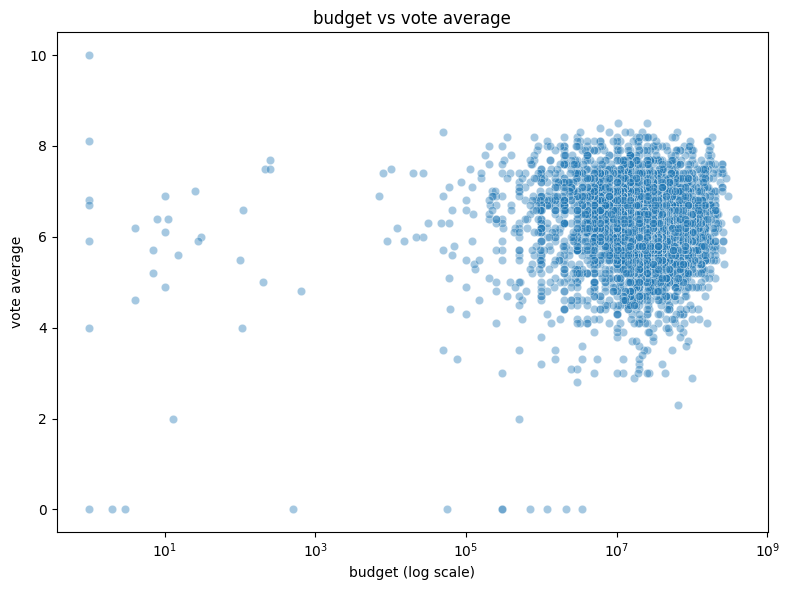

(np.float64(0.09314574534816306), np.float64(0.06618290058699862))

In [10]:
#relacionn entre presupuesto y rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x="budget", y="vote_average", alpha=0.4)
plt.xscale('log')  #presupuestos varían mucho; escala log ayuda
plt.xlabel("budget (log scale)")
plt.ylabel("vote average")
plt.title("budget vs vote average")
plt.tight_layout()
plt.show()

#correlaciones
pearson = merged[["budget","vote_average"]].dropna().corr(method="pearson").iloc[0,1]
spearman = merged[["budget","vote_average"]].dropna().corr(method="spearman").iloc[0,1]
pearson, spearman

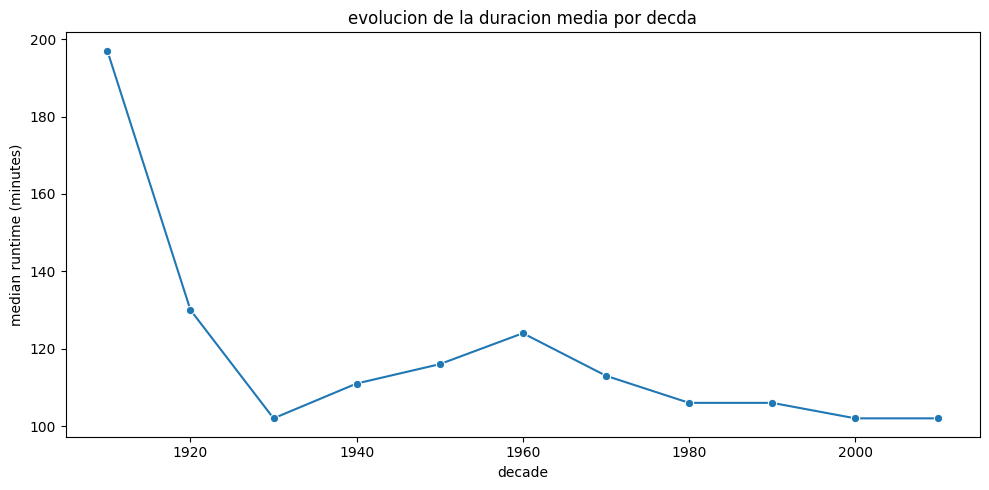

In [11]:
#evolucion de la duracion de peliculas en los ultimos 50 anios
#extraer anio y decada
merged["year"] = merged["release_date"].dt.year
merged = merged[merged["year"].notna()]  #filtrar sin fecha
merged["decade"] = (merged["year"] // 10 * 10).astype(int)

#agrupar
runtime_by_decade = merged.groupby("decade")["runtime"].agg(["count","mean","median"]).reset_index()
runtime_by_decade

plt.figure(figsize=(10,5))
sns.lineplot(data=runtime_by_decade, x="decade", y="median", marker="o")
plt.xlabel("decade")
plt.ylabel("median runtime (minutes)")
plt.title("evolucion de la duracion media por decda")
plt.tight_layout()
plt.show()


In [12]:
#directores con mejor rating promedio
#filtrar directores con al menos n peliiculas
n = 5
directors_stats = merged.groupby("director").agg(
    movies_count = ("id", "count"),
    avg_rating = ("vote_average", "mean")
).reset_index()
top_directors = directors_stats[directors_stats["movies_count"]>=n].sort_values("avg_rating", ascending=False)
top_directors.head(20)

,director,movies_count,avg_rating
360,Christopher Nolan,8,7.800000
1778,Quentin Tarantino,8,7.775000
2057,Stanley Kubrick,6,7.683333
673,Frank Capra,5,7.620000
504,David Lynch,5,7.440000
2296,Wes Anderson,7,7.414286
488,David Fincher,10,7.340000
1737,Peter Jackson,9,7.333333
885,James Cameron,7,7.328571
1432,Martin Scorsese,20,7.295000


In [13]:
#crear carpeta de resultados si no existe
import os
os.makedirs("api/resultados", exist_ok=True)

correlaciones = {
    "pearson": float(pearson),
    "spearman": float(spearman)
}

with open("api/resultados/correlacion_budget_rating.json", "w", encoding="utf-8") as f:json.dump(correlaciones, f, indent=4)

runtime_by_decade.to_json("api/resultados/runtime_por_decada.json", orient="records", indent=4)

top_directors.head(50).to_json("api/resultados/directores_top.json", orient="records", indent=4)

print("archivos generados en api/resultados/")

archivos generados en api/resultados/
